# Regression Method

-  Parametric Method
    1. Linear Regression
    2. Polynomial Regression
    3. Ridge Regression
-  Non Parametric Method
    1. DT Rgressor
    2. SVR
    3. RFR
-  Principle Component Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv ("automobileEDA.csv")
Data1 = data.copy()

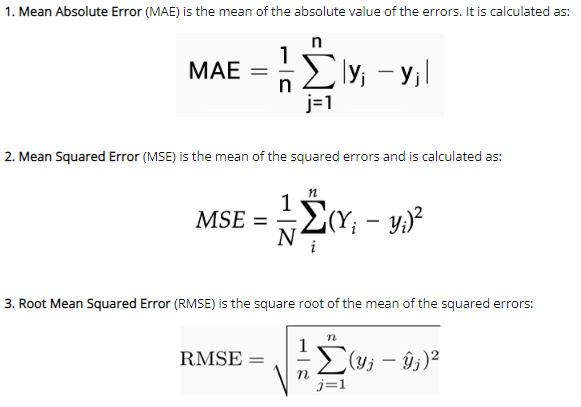

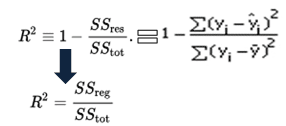

In [38]:
Data = pd.read_csv('Position_Salaries.csv')
Data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [39]:
y = Data[["Salary"]]
x = Data[["Level"]]

# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

y_pred = lin_reg.predict(x)

In [41]:
prediction_test = pd.DataFrame(y_pred,columns = ["Predicted"])
prediction_test

prediction.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

Value_test = pd.concat( [prediction_test, y], axis=1)
Value_test

residuals = y.values-y_pred
residu = pd.DataFrame(residuals,columns = ["Residuals"])

residu.reset_index(drop=True, inplace=True)
Val_pre = pd.concat([Value_test,residu],axis = 1)
Val_pre

,Predicted,Salary,Residuals
0,-114454.545455,45000,159454.545455
1,-33575.757576,50000,83575.757576
2,47303.030303,60000,12696.969697
3,128181.818182,80000,-48181.818182
4,209060.606061,110000,-99060.606061
5,289939.393939,150000,-139939.393939
6,370818.181818,200000,-170818.181818
7,451696.969697,300000,-151696.969697
8,532575.757576,500000,-32575.757576
9,613454.545455,1000000,386545.454545


In [42]:
from  sklearn import metrics

print ('Mean Absolute Error:', metrics.mean_absolute_error(y.values, y_pred))
print ('Mean Squared Error:', metrics.mean_squared_error(y.values, y_pred))  
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y.values, y_pred)))

Mean Absolute Error: 128454.54545454546
Mean Squared Error: 26695878787.878784
Root Mean Squared Error: 163388.73519272613


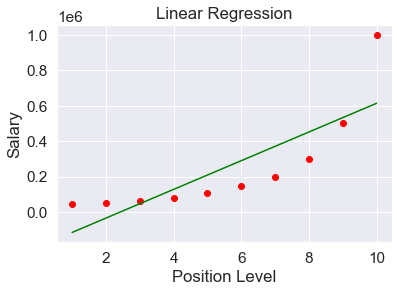

In [43]:
plt.title('Linear Regression')

plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'green')

plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

y_pred_pol = lin_reg_2.predict(poly_reg.fit_transform(x))
y_pred_pol

array([[ 53356.64335691],
       [ 31759.90676   ],
       [ 58642.19114225],
       [ 94632.86713296],
       [121724.94172506],
       [143275.05827517],
       [184003.49650353],
       [289994.17249408],
       [528694.63869438],
       [988916.08391567]])

In [45]:
prediction_test = pd.DataFrame(y_pred_pol,columns = ["Predicted"])
prediction_test

prediction.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

Value_test = pd.concat( [prediction_test, y], axis=1)
Value_test

residuals = y.values-y_pred
residu = pd.DataFrame(residuals,columns = ["Residuals"])

residu.reset_index(drop=True, inplace=True)
Val_pre = pd.concat([Value_test,residu],axis = 1)
Val_pre

,Predicted,Salary,Residuals
0,53356.643357,45000,159454.545455
1,31759.906760,50000,83575.757576
2,58642.191142,60000,12696.969697
3,94632.867133,80000,-48181.818182
4,121724.941725,110000,-99060.606061
5,143275.058275,150000,-139939.393939
6,184003.496504,200000,-170818.181818
7,289994.172494,300000,-151696.969697
8,528694.638694,500000,-32575.757576
9,988916.083916,1000000,386545.454545


In [46]:
from  sklearn import metrics

print ('Mean Absolute Error:', metrics.mean_absolute_error(y.values, y_pred_pol))
print ('Mean Squared Error:', metrics.mean_squared_error(y.values, y_pred_pol))  
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y.values, y_pred_pol)))

Mean Absolute Error: 12681.818181861294
Mean Squared Error: 210343822.84382465
Root Mean Squared Error: 14503.234909627046


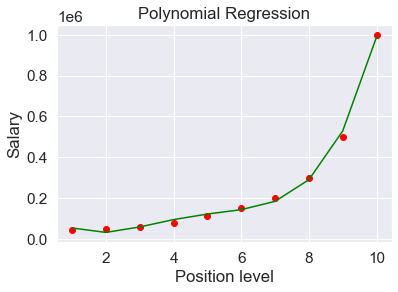

In [47]:
plt.title('Polynomial Regression')

plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'green')

plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Ridge Regression

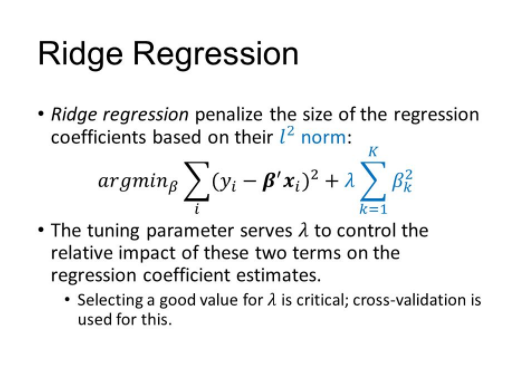

In [48]:
data = pd.read_csv ("automobileEDA.csv")
Dataset = data[["engine-size","bore","horsepower","city-L/100km"]]
Dataset

,engine-size,bore,horsepower,city-L/100km
0,130,3.47,111.0,11.190476
1,130,3.47,111.0,11.190476
2,152,2.68,154.0,12.368421
3,109,3.19,102.0,9.791667
4,136,3.19,115.0,13.055556
...,...,...,...,...
196,141,3.78,114.0,10.217391
197,141,3.78,160.0,12.368421
198,173,3.58,134.0,13.055556
199,145,3.01,106.0,9.038462


**Multicollinearity**

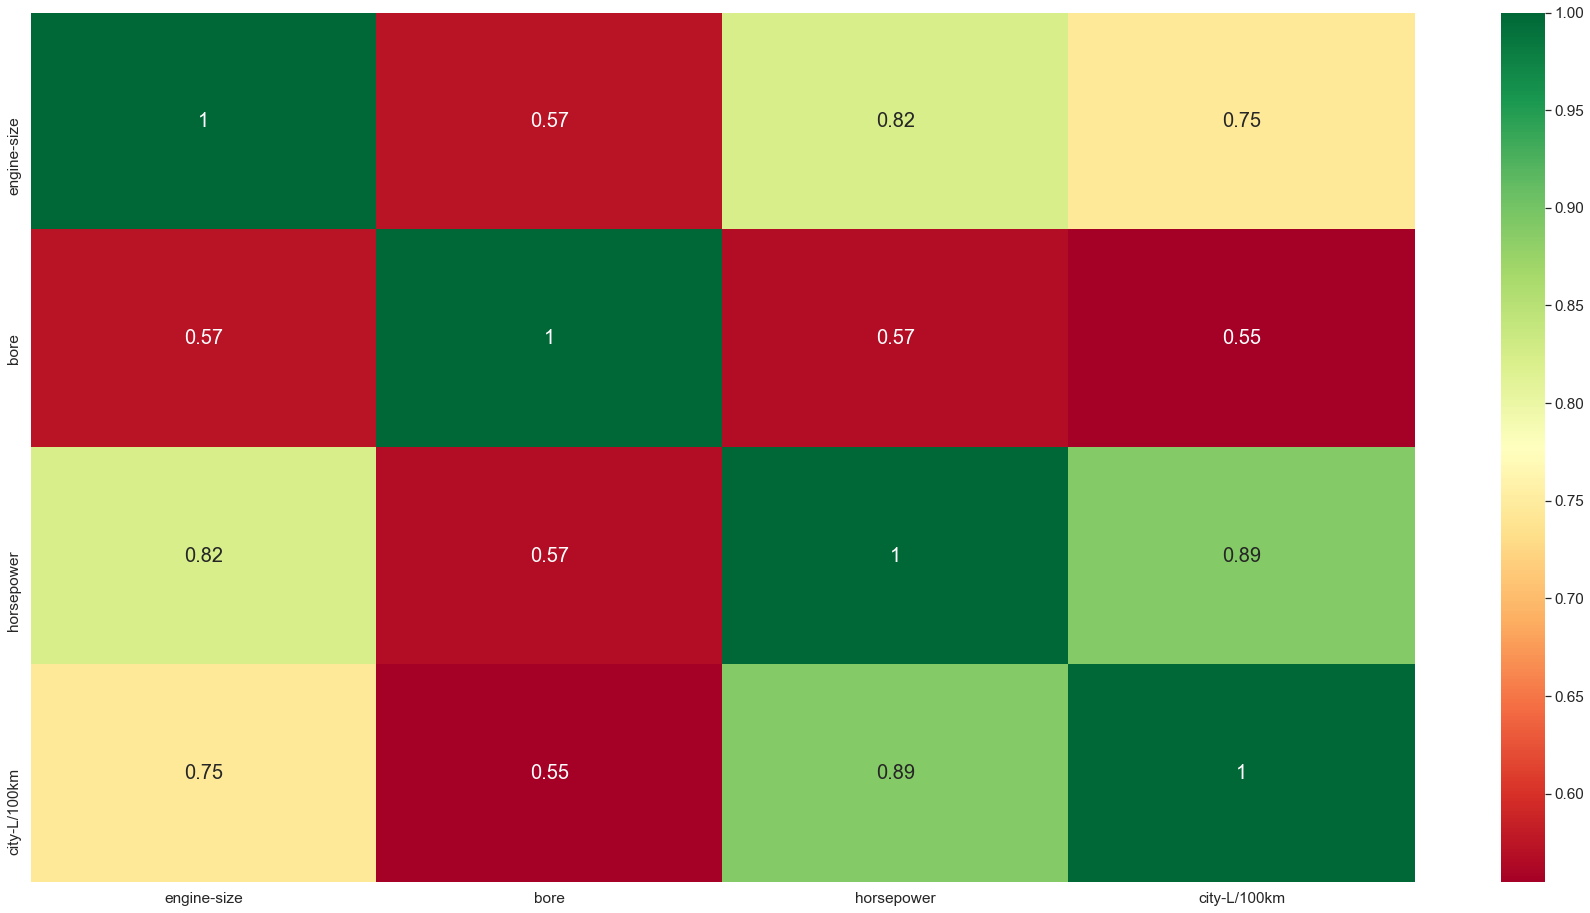

In [49]:
plt.figure(figsize=(31,16))
correlation = Dataset.corr(method = 'pearson')

sns.heatmap(correlation,annot=True,cmap="RdYlGn",annot_kws={"size": 20})

sns.set(font_scale=1.4)

In [50]:
#Standaritation
def z_score (df):
    df_z = df.copy()
    for column in df_z.columns :
        df_z[column] = (df_z[column]-df_z[column].mean())/df_z[column].std()
    return df_z

Data_new = z_score(Dataset)
Data_new 

,engine-size,bore,horsepower,city-L/100km
0,0.075201,0.519668,0.203247,0.491727
1,0.075201,0.519668,0.203247,0.491727
2,0.604724,-2.427303,1.354035,0.956473
3,-0.430252,-0.524828,-0.037616,-0.060159
4,0.219617,-0.524828,0.310297,1.227575
...,...,...,...,...
196,0.339963,1.676075,0.283535,0.107806
197,0.339963,1.676075,1.514610,0.956473
198,1.110178,0.930006,0.818785,1.227575
199,0.436240,-1.196290,0.069434,-0.357328


In [51]:
y = Data_new[["city-L/100km"]]
x = Data_new.drop(columns = y)

x

,engine-size,bore,horsepower
0,0.075201,0.519668,0.203247
1,0.075201,0.519668,0.203247
2,0.604724,-2.427303,1.354035
3,-0.430252,-0.524828,-0.037616
4,0.219617,-0.524828,0.310297
...,...,...,...
196,0.339963,1.676075,0.283535
197,0.339963,1.676075,1.514610
198,1.110178,0.930006,0.818785
199,0.436240,-1.196290,0.069434


In [52]:
from sklearn.linear_model import Ridge

rdg = Ridge(alpha=1.0)
rdg.fit(x, y)

ridge_predict = rdg.predict(x)
print("R squared: {}".format(r2_score(y_true=y,y_pred=ridge_predict)))

R squared: 0.7949671745985301


In [53]:
from  sklearn import metrics

print ('Mean Absolute Error:', metrics.mean_absolute_error(y.values, ridge_predict))
print ('Mean Squared Error:', metrics.mean_squared_error(y.values, ridge_predict))  
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y.values, ridge_predict)))

Mean Absolute Error: 0.32505041552915004
Mean Squared Error: 0.20401276159350254
Root Mean Squared Error: 0.45167771872597673


# Non Parametric Method

In [54]:
data = pd.read_csv ("automobileEDA.csv")

#encoding
Data_num = data.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_cat = data.drop(columns = Data_numeric.columns)

Data_cat = Data_cat.apply(lambda x:x.astype("category"))
Data_cat = Data_cat.apply(lambda x:x.cat.codes)

#Join
Dataset = pd.concat([Data_cat,Data_numeric],axis =1)

#remove missing
Dataset = Dataset.dropna()
Dataset

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,diesel,gas,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,5,0,0,1,0,2,0,0,2,5,2,0,1,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,5,0,0,1,0,2,0,0,2,5,2,0,1,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,3,0,0,1,2,2,0,4,3,5,2,0,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,4,1,0,0,3,1,0,2,2,5,2,0,1,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,4,1,0,0,3,0,0,2,1,5,2,0,1,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,2,0,1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391
197,1,21,1,0,3,2,0,2,2,5,0,0,1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421
198,1,21,0,0,3,2,0,4,3,5,2,0,1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556
199,1,21,1,0,3,2,0,2,3,3,2,1,0,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462


In [55]:
x = Dataset.drop(columns = ['price'])
y = Dataset.drop(columns = x.columns)

**Decision Tree Regressor**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25)

In [57]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(max_depth = 3,random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

R squared: 0.9227281592836942


In [58]:
from  sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, dec_tree_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, dec_tree_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, dec_tree_y_pred)))

Mean Absolute Error: 1624.2770205756722
Mean Squared Error: 4229386.435049524
Root Mean Squared Error: 2056.547211967069


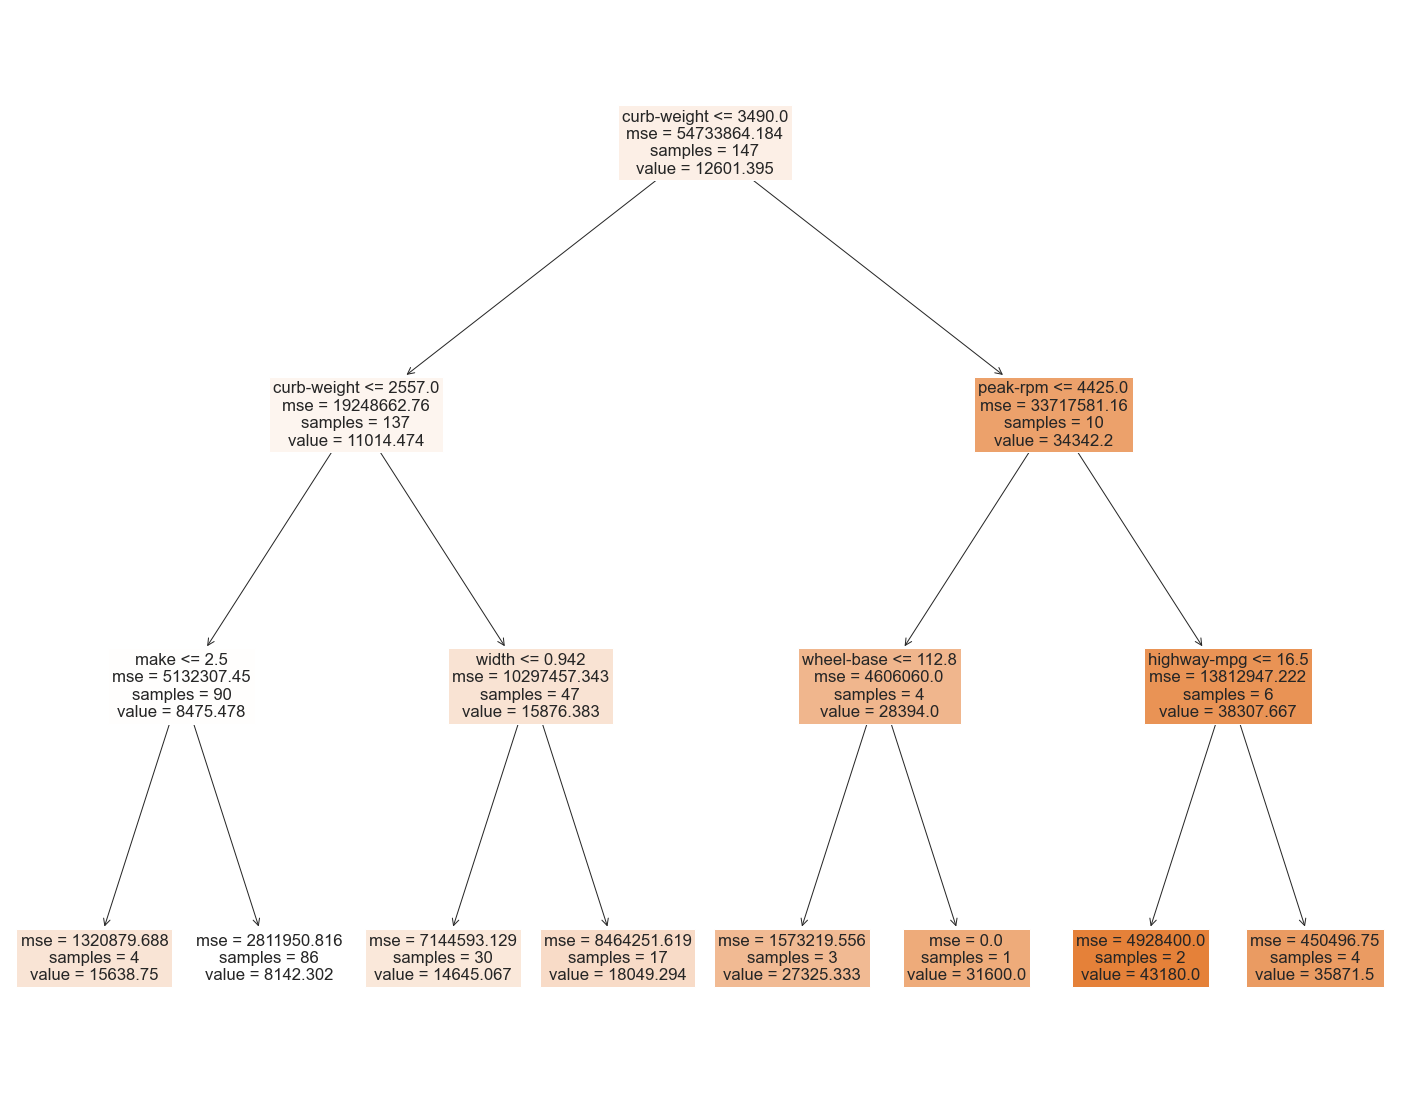

In [59]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
Plot= tree.plot_tree(dec_tree, feature_names=Dataset.columns, filled=True)

**Support Vector Regression**

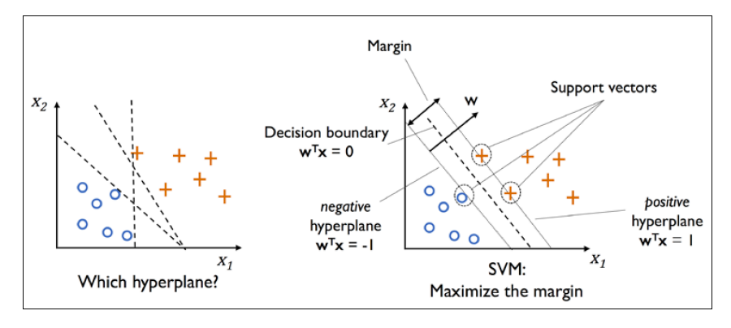

In [60]:
def z_score (df):
    df_z = df.copy()
    for column in df_z.columns :
        df_z[column] = (df_z[column]-df_z[column].mean())/df_z[column].std()
    return df_z

New_Data= z_score(Dataset)
New_Data

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,diesel,gas,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,1.793061,-1.970380,-0.471665,1.181237,-3.026462,1.241318,-0.124038,-2.517387,-0.098972,0.855320,1.267998,-0.335292,0.335292,0.017729,-1.681313,-0.443200,-0.844656,-2.106046,-0.020301,0.049008,0.514375,-1.807024,-0.291731,0.204857,-0.214109,-0.682595,-0.56556,0.035405,0.533796
1,1.793061,-1.970380,-0.471665,1.181237,-3.026462,1.241318,-0.124038,-2.517387,-0.098972,0.855320,1.267998,-0.335292,0.335292,0.017729,-1.681313,-0.443200,-0.844656,-2.106046,-0.020301,0.049008,0.514375,-1.807024,-0.291731,0.204857,-0.214109,-0.682595,-0.56556,0.409926,0.533796
2,0.165259,-1.970380,-0.471665,1.181237,-0.724481,1.241318,-0.124038,2.454294,1.673524,0.855320,1.267998,-0.335292,0.335292,0.017729,-0.715231,-0.250036,-0.185097,-0.605084,0.506436,0.582678,-2.402978,0.667478,-0.291731,1.346162,-0.214109,-0.996414,-0.71274,0.409926,1.006748
3,0.979160,-1.811296,-0.471665,-0.842273,0.426509,-0.583605,-0.124038,-0.031546,-0.098972,0.855320,1.267998,-0.335292,0.335292,1.327464,0.152605,0.184585,0.144682,0.187091,-0.424453,-0.460404,-0.519624,0.448218,-0.044459,-0.034021,0.859121,-0.211867,-0.12402,0.092112,-0.027834
4,0.979160,-1.811296,-0.471665,-0.842273,0.426509,-2.408528,-0.124038,-0.031546,-1.871468,0.855320,1.267998,-0.335292,0.335292,1.327464,0.087108,0.184585,0.238905,0.187091,0.508352,0.194554,-0.519624,0.448218,-0.539004,0.311025,0.859121,-1.153323,-1.30146,0.528327,1.282637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.462543,1.370383,-0.471665,-0.842273,0.426509,1.241318,-0.124038,-0.031546,-0.098972,0.855320,1.267998,-0.335292,0.335292,-0.824243,1.675412,1.166506,1.416688,0.687412,0.753524,0.315843,1.659159,-0.334852,-0.168095,0.284483,0.644475,-0.368777,-0.41838,0.452924,0.143097
197,-1.462543,1.370383,2.109389,-0.842273,0.426509,1.241318,-0.124038,-0.031546,-0.098972,0.855320,-1.835053,-0.335292,0.335292,-0.824243,1.675412,1.166506,1.369577,0.687412,0.939319,0.315843,1.659159,-0.334852,-0.365913,1.505414,0.429829,-0.996414,-0.85992,0.727116,1.006748
198,-1.462543,1.370383,-0.471665,-0.842273,0.426509,1.241318,-0.124038,2.454294,1.673524,0.855320,1.267998,-0.335292,0.335292,-0.824243,1.675412,1.166506,1.416688,0.687412,0.868449,1.092090,0.920589,-1.211890,-0.341186,0.815322,0.859121,-1.153323,-1.15428,1.031219,1.282637
199,-1.462543,1.370383,2.109389,-0.842273,0.426509,1.241318,-0.124038,-0.031546,1.673524,-0.132938,1.267998,2.967335,-2.967335,-0.824243,1.675412,1.166506,1.416688,0.687412,1.261108,0.412874,-1.184337,0.448218,3.170083,0.072147,-0.643401,0.101951,-0.56556,1.153982,-0.330250


In [65]:
x = New_Data.drop(columns = ['price'])
y = New_Data.drop(columns = x.columns)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25)

In [67]:
from sklearn.svm import SVR

svr = SVR(kernel = 'poly')

svr.fit(X_train,y_train.values.ravel())
svr_y_pred = svr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

R squared: 0.957442985918024


In [68]:
from  sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, svr_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, svr_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, svr_y_pred)))

Mean Absolute Error: 0.13715516077620135
Mean Squared Error: 0.04757155317170792
Root Mean Squared Error: 0.21810903963776448


**Randomforest Regressor**

In [69]:
data = pd.read_csv ("automobileEDA.csv")

#encoding
Data_num = data.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_cat = data.drop(columns = Data_numeric.columns)

Data_cat = Data_cat.apply(lambda x:x.astype("category"))
Data_cat = Data_cat.apply(lambda x:x.cat.codes)

#Join
Dataset = pd.concat([Data_cat,Data_numeric],axis =1)

#remove missing
Dataset = Dataset.dropna()
Dataset

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,diesel,gas,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,5,0,0,1,0,2,0,0,2,5,2,0,1,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,5,0,0,1,0,2,0,0,2,5,2,0,1,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,3,0,0,1,2,2,0,4,3,5,2,0,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,4,1,0,0,3,1,0,2,2,5,2,0,1,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,4,1,0,0,3,0,0,2,1,5,2,0,1,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,2,0,1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391
197,1,21,1,0,3,2,0,2,2,5,0,0,1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421
198,1,21,0,0,3,2,0,4,3,5,2,0,1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556
199,1,21,1,0,3,2,0,2,3,3,2,1,0,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462


In [70]:
x = Dataset.drop(columns = ['price'])
y = Dataset.drop(columns = x.columns)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25)

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(max_depth = 5, n_estimators = 50, random_state=123)

rf_tree.fit(X_train,y_train.values.ravel())
rf_tree_y_pred = rf_tree.predict(X_train)


print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

R squared: 0.9763075440507448


In [73]:
from  sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, rf_tree_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, rf_tree_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, rf_tree_y_pred)))

Mean Absolute Error: 936.0508030554787
Mean Squared Error: 1587087.16042019
Root Mean Squared Error: 1259.7964757928917


# Principle Component Analysis

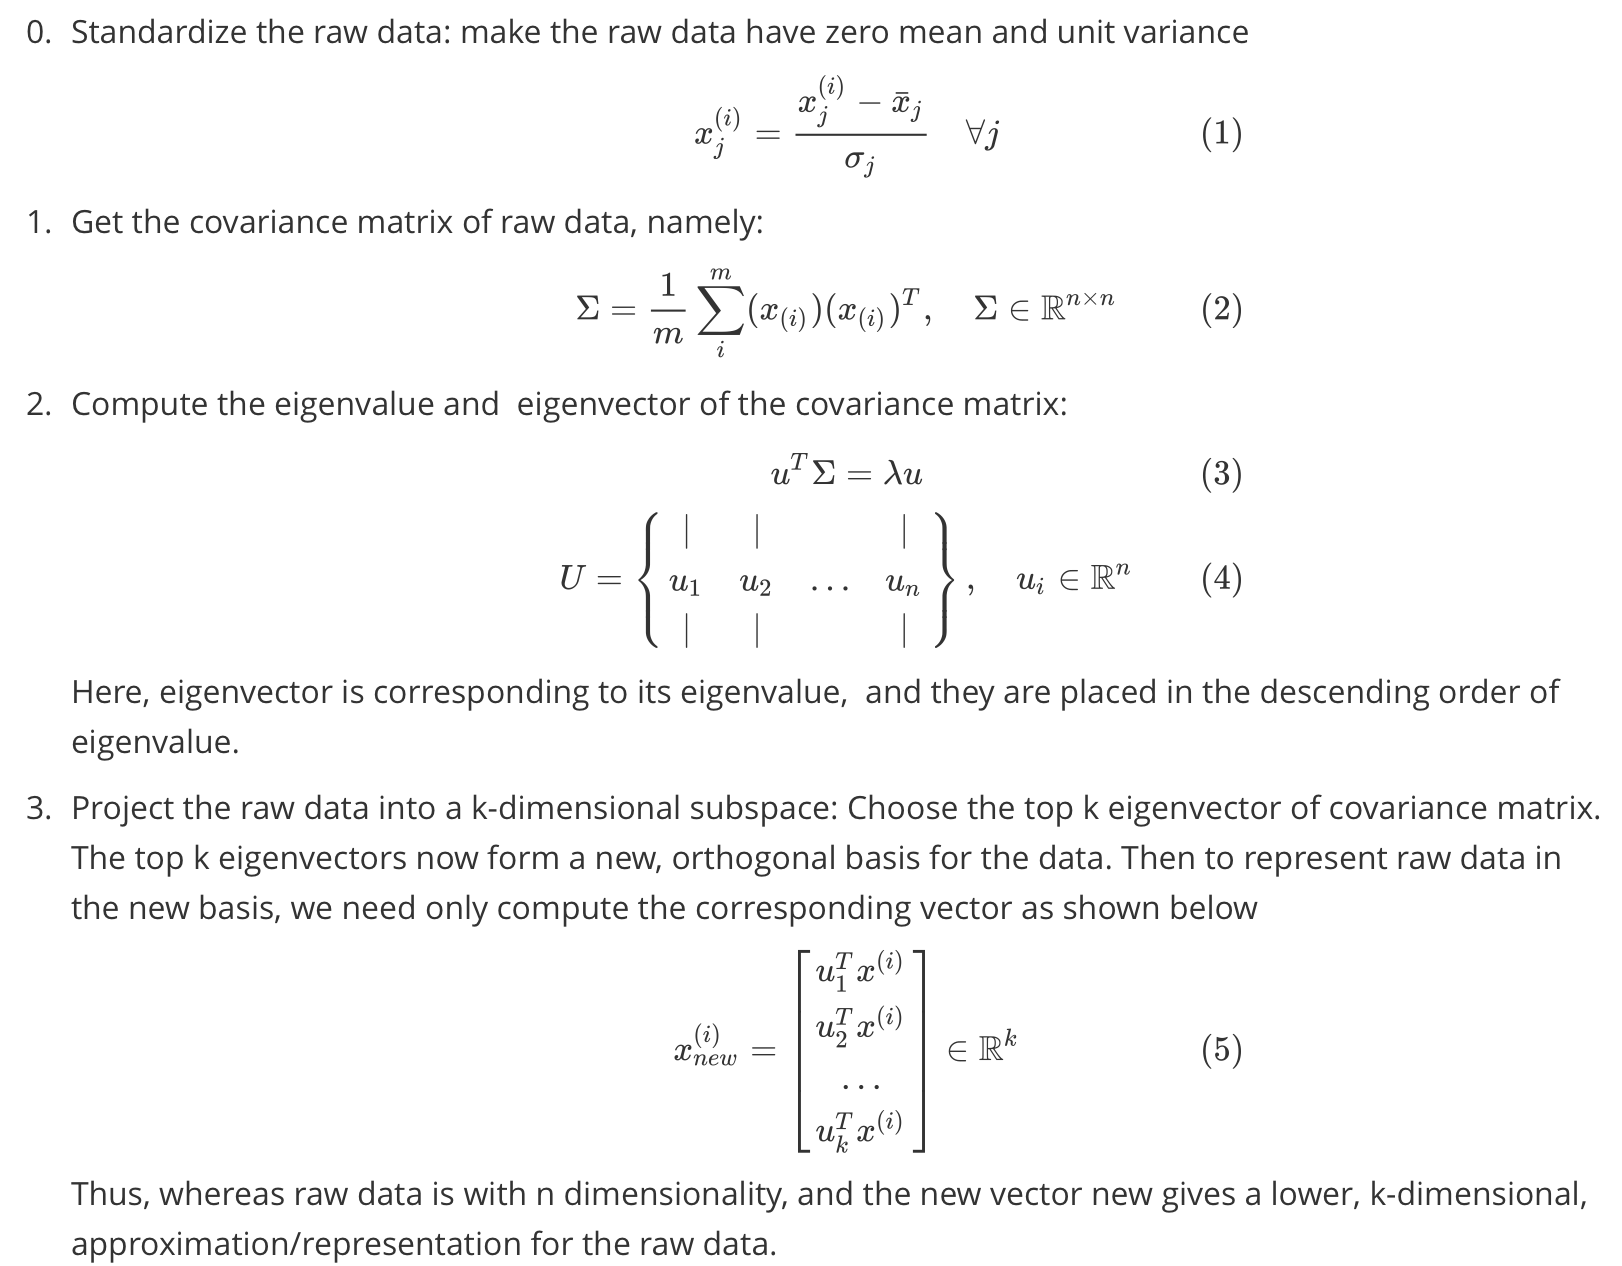

In [74]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

Data.to_csv('iris.csv')

In [75]:
Dataset = pd.read_csv('iris.csv',index_col = 0)
Dataset

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [76]:
y = Dataset[["target"]]
x = Dataset.drop(columns = y)

In [77]:
def z_score (df):
    df_z = df.copy()
    for column in df_z.columns :
        df_z[column] = (df_z[column]-df_z[column].mean())/df_z[column].std()
    return df_z

X_new = z_score(x)
X_new

,sepal length,sepal width,petal length,petal width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal = pca.fit_transform(x)
principal_DF = pd.DataFrame(data = principal, columns = ['PC 1', 'PC 2'])

Df = pd.concat([principal_DF, y], axis = 1)
Df

,PC 1,PC 2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


In [87]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

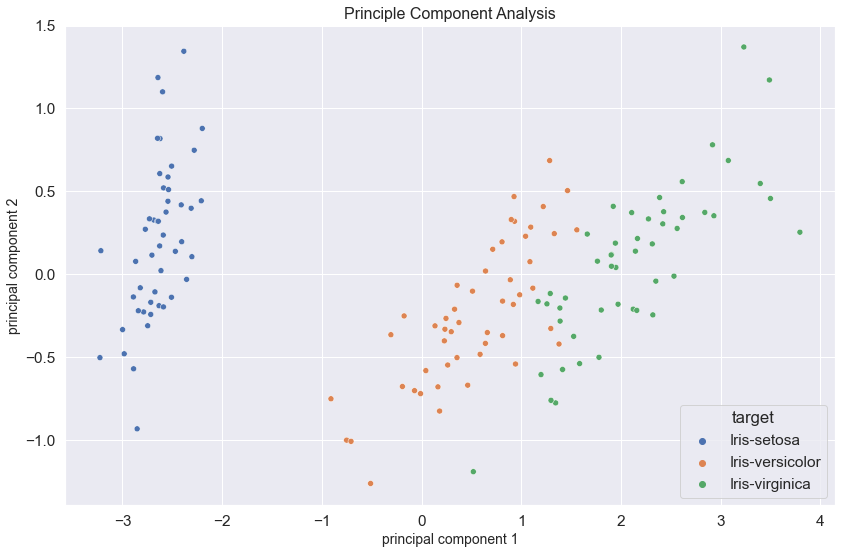

In [88]:
plt.figure(figsize = (12,8))

plt.title('Principle Component Analysis', size = 16)

sns.scatterplot(x = 'PC 1', y = 'PC 2', 
                hue = 'target', data = Df)

plt.xlabel('principal component 1', size = 14)
plt.ylabel('principal component 2', size = 14)

plt.tight_layout()